In [9]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [10]:
%pip install sklearn

Note: you may need to restart the kernel to use updated packages.


**IMPORTING THE REQUIRED LIBRARIRES **

In [11]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


**READING THE CSV FILE FROM THE PROVIDE LINK**

In [12]:
data = pd.read_csv ('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [13]:

# Check if there any null value in the Dataset
data.isnull == True

False

**PLOTTING HOURS AND SCORES AS A SCATTER PLOT**

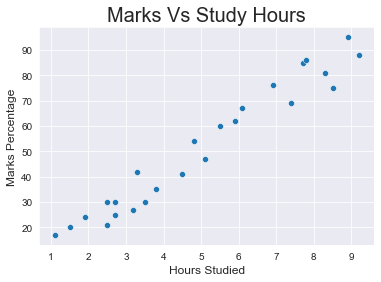

In [14]:
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

**PLOTTING THE LINER REGRESSION AND THE CORRELATION**

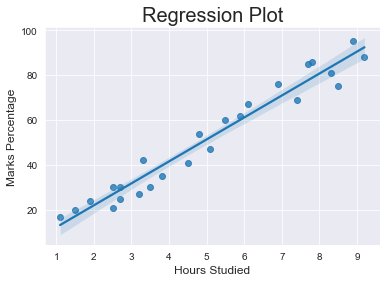

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [28]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

**LOADIND DATA IN TWO VARIABLES SO THAT IT CAN BE SPLIT UP FOR TRAINING AND TESTING**

In [37]:
# Defining X and y from the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Spliting the Data in two
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)
print("X",X)
print('y',y)
print("train_X",train_X)
print("train_y",train_y)
print("test_X",test_X)
print("test_y",test_y)


X [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
y [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]
train_X [[7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]
train_y [86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]
test_X [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]
test_y [20 27 69 30 62 35 24]


**USING THE TRAIN SET TO TRAIN THE LINEAR REGRESSION MODEL**

In [29]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("Model is Trained")

Model is Trained


**USING THE PREDICTION MODEL, PERCENTAGE OBTAINED IS PREDICTED**

In [36]:
pred_y = regression.predict(test_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in test_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


**COMPARING THE ACTUAL MARKS AND PREDICTED MARKS**

In [31]:
compare_scores = pd.DataFrame({'Actual Marks': test_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


**PLOTTING A  GRAPH FOR THE ABOVE COMPARISON**
*BLUE IS TEST SET*
*BLACK IS PREDICTED*

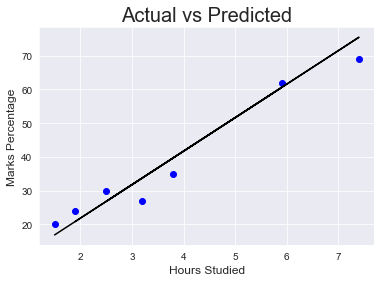

In [32]:
plt.scatter(x=test_X, y=test_y, color='blue')
plt.plot(test_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

**CAULCULATING MEAN ABSOLUTE ERROR**

In [33]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502486


**USING THE PREDICTION MODEL TO SOLVE THE PROBLEM STATEMENT**

In [34]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893
